# HCAIM Deep Learinng Module - CA1
- Wan Yit Yong (X00205680)

### Introduction

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import*
from tensorflow import keras

# sklearn 10FCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SpatialDropout3D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

seed = 1
np.random.seed(seed)

plt.rcParams["figure.figsize"] = (15,5)

### Opening the dataset, brief data exploration and data pre-processing

In [2]:
# Read the csv file
data = pd.read_csv("X00205680.csv")
data.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,1,1,22,1,0,0,1,1,1,...,0,1,0,0,0,1,11,6,7,0
1,0,1,1,23,1,0,0,0,0,1,...,0,4,0,3,1,0,8,4,7,0
2,0,1,1,25,1,0,0,1,0,1,...,0,2,0,0,0,1,9,4,8,1
3,0,0,1,19,0,0,0,0,1,1,...,0,2,0,0,0,1,4,6,8,0
4,1,0,1,29,1,0,0,1,1,1,...,0,3,0,0,0,0,9,4,7,1


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,42415.0,0.563904,0.495905,0.0,0.0,1.0,1.0,1.0
HighChol,42415.0,0.527526,0.499248,0.0,0.0,1.0,1.0,1.0
CholCheck,42415.0,0.975221,0.155453,0.0,1.0,1.0,1.0,1.0
BMI,42415.0,29.892727,7.130757,13.0,25.0,29.0,33.0,98.0
Smoker,42415.0,0.476482,0.499453,0.0,0.0,0.0,1.0,1.0
Stroke,42415.0,0.062054,0.241256,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,42415.0,0.148391,0.355491,0.0,0.0,0.0,0.0,1.0
PhysActivity,42415.0,0.701898,0.457430,0.0,0.0,1.0,1.0,1.0
Fruits,42415.0,0.614476,0.486725,0.0,0.0,1.0,1.0,1.0
Veggies,42415.0,0.789320,0.407796,0.0,1.0,1.0,1.0,1.0


In [4]:
print("The size of the data is (in KB):", data.size)
print("The shape of the data is (Rows x Columns):", data.shape)
print(data.columns)

The size of the data is (in KB): 933130
The shape of the data is (Rows x Columns): (42415, 22)
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


In [ ]:
# Check the data variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                42415 non-null  int64
 1   HighChol              42415 non-null  int64
 2   CholCheck             42415 non-null  int64
 3   BMI                   42415 non-null  int64
 4   Smoker                42415 non-null  int64
 5   Stroke                42415 non-null  int64
 6   HeartDiseaseorAttack  42415 non-null  int64
 7   PhysActivity          42415 non-null  int64
 8   Fruits                42415 non-null  int64
 9   Veggies               42415 non-null  int64
 10  HvyAlcoholConsump     42415 non-null  int64
 11  AnyHealthcare         42415 non-null  int64
 12  NoDocbcCost           42415 non-null  int64
 13  GenHlth               42415 non-null  int64
 14  MentHlth              42415 non-null  int64
 15  PhysHlth              42415 non-null  int64
 16  Diff

In [5]:
# Check any empty / missing data
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [6]:
data.duplicated().sum()

703

In [7]:
data.loc[data.duplicated(),:]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
1019,0,1,1,26,0,0,0,1,1,1,...,0,2,0,0,0,1,7,6,8,0
1535,0,0,1,38,0,0,0,1,1,1,...,0,3,0,0,0,1,7,6,8,0
1963,0,0,1,22,0,0,0,1,1,1,...,0,2,0,0,0,0,7,6,8,0
2279,1,0,1,31,0,0,0,1,0,1,...,0,3,0,0,0,1,11,6,7,1
2301,1,1,1,26,1,0,0,1,1,1,...,0,3,0,0,0,1,11,6,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42196,0,0,1,21,1,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
42212,1,0,1,25,0,0,0,1,1,1,...,0,1,0,0,0,1,7,6,8,0
42264,1,1,1,32,1,0,0,1,1,1,...,0,3,0,0,0,1,9,5,7,1
42303,0,0,1,32,0,0,0,1,1,1,...,0,2,0,0,0,0,4,6,8,0


In [8]:
print("The shape of the data before is (Rows x Columns):", data.shape)
data.drop_duplicates(inplace=True)
print("The shape of the data after is (Rows x Columns):", data.shape)

The shape of the data before is (Rows x Columns): (42415, 22)
The shape of the data after is (Rows x Columns): (41712, 22)


In [9]:
data['Diabetes_binary'].value_counts()

1    21135
0    20577
Name: Diabetes_binary, dtype: int64

*** 0 - No Diabetes ***

*** 1 - Diabetes ***

After checking and removing the missing (null) and duplicate data, so we don't need to fill up or drop any data. Besides that, all columns are numerical number so we also don't need to do any label encoder or get_dummies (one-hot encoding). So for the next step in pre-processing will be split the data into X and Y dataset which seperate the label class from others. Besides that, we will also normalised the data before start putting into Deep Learning models.

In [11]:
col = data.values

X = col[:, 0:21]
Y = col[:, 21]

print("Before Normalized: \n", X)

scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)

print("\nAfter Normalized: \n", normalizedX)

Before Normalized: 
 [[ 0  1  1 ... 11  6  7]
 [ 0  1  1 ...  8  4  7]
 [ 0  1  1 ...  9  4  8]
 ...
 [ 1  0  1 ... 11  6  7]
 [ 1  1  1 ... 10  5  8]
 [ 0  0  1 ...  1  5  3]]

After Normalized: 
 [[0.         0.03782347 0.03782347 ... 0.41605821 0.22694084 0.26476432]
 [0.         0.03809697 0.03809697 ... 0.30477573 0.15238786 0.26667876]
 [0.         0.03542182 0.03542182 ... 0.31879636 0.14168727 0.28337454]
 ...
 [0.0256579  0.         0.0256579  ... 0.2822369  0.1539474  0.1796053 ]
 [0.02400768 0.02400768 0.02400768 ... 0.24007684 0.12003842 0.19206147]
 [0.         0.         0.04559608 ... 0.04559608 0.22798038 0.13678823]]


After normalized the X data, we will now able to split the X and Y data into train and test for further machine learning.

In [12]:
X_train, X_test, Y_train, Y_test  = train_test_split(normalizedX, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y))


# Examine the class breakdown per dataset:
print("Training dataset length:", len(X_train))
print("Testing dataset length:", len(X_test))

class1TrainingPer = np.count_nonzero(Y_train == 1) / len(X_train)
class1TestPer = np.count_nonzero(Y_test == 1) / len(X_test)

print("\nPercentage of 1's in Training data: ", round(class1TrainingPer*100,2), "%")
print("Percentage of 1's in Test data    : ", round(class1TestPer*100,2), "%")

Training dataset length: 27947
Testing dataset length: 13765

Percentage of 1's in Training data:  50.67 %
Percentage of 1's in Test data    :  50.67 %


From the description above, we know that the dataset for training and testing contains almost equal (50%) between the 0 and 1 label which will given a better outcome after the machine learning model implement. Before moving to the next step, ;et see the heatmap for this dataset so we can observed which columns are highly related and which are not.

<AxesSubplot:>

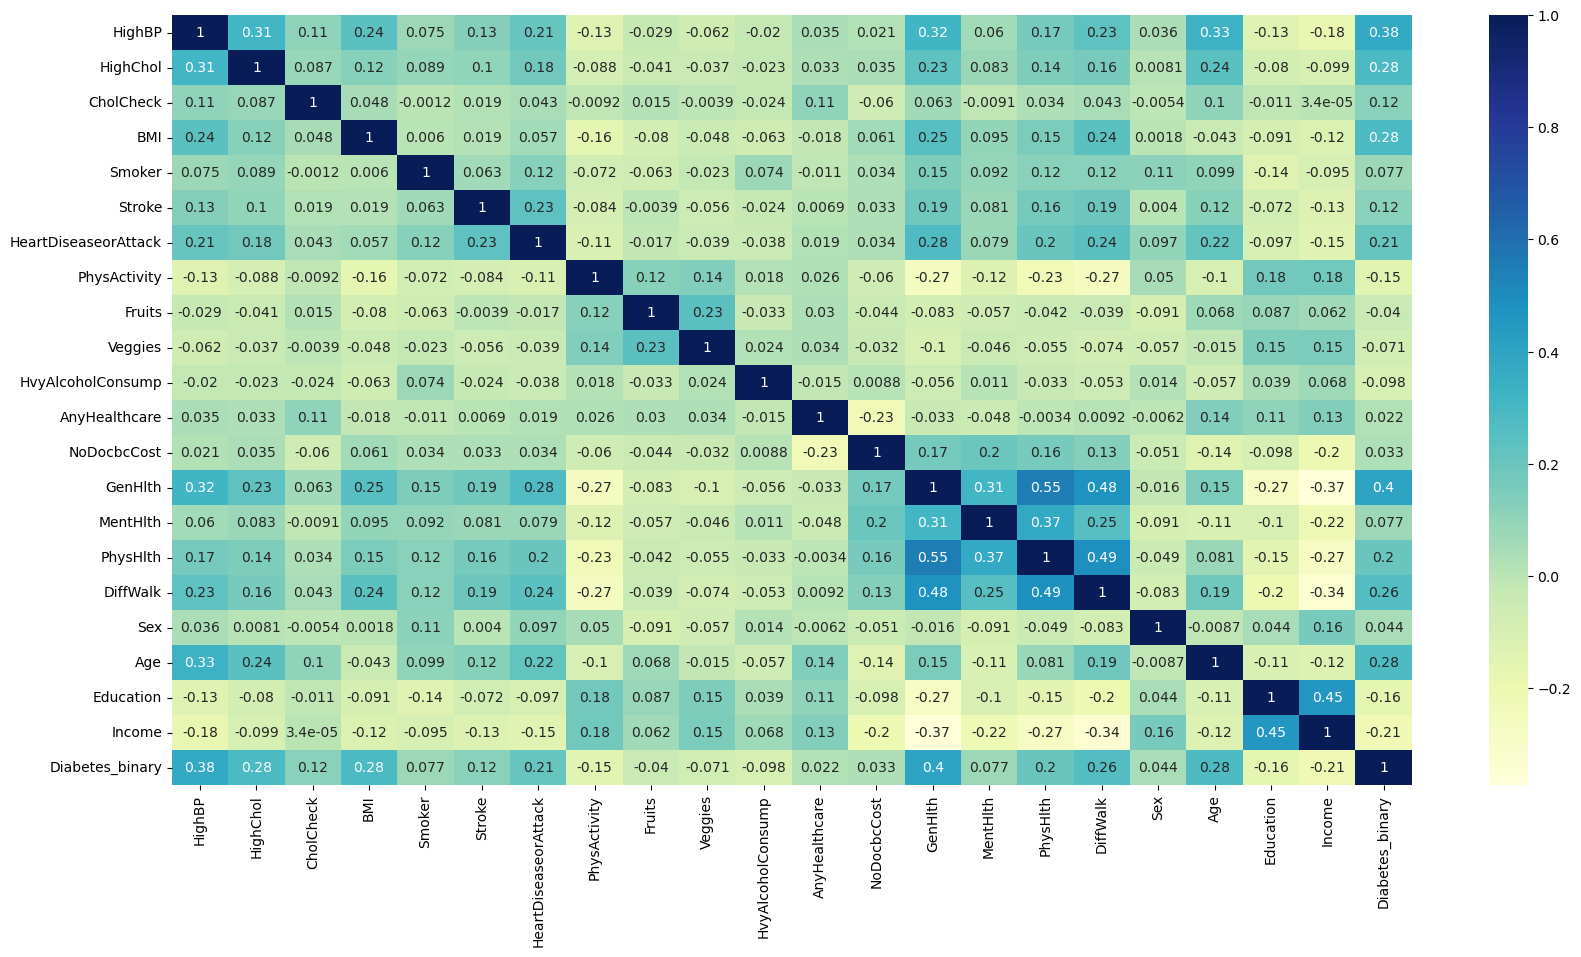

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

From the heatmap above, we notice that most of the attributes are not highly correlated with the 'Diabetes_binary'. The highest correlated attribute is 'GenHlth', coming up with 'HighBP' which stand for 'General Health' and 'High Blood Preasure'.

### Model Exploration to determine network topology
- 8 required

In [14]:
# Funtion to provide plot for loss and accuracy
def plot_acc_loss(results):
  plt.subplot(1,2,1)
  # summarize history for loss
  plt.plot(results.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(results.history['acc'])
  plt.title('model accuracy')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#### Build the model (relative large)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 7s 240us/sample - loss: 0.6931 - acc: 0.5058
Epoch 2/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.6931 - acc: 0.5067
Epoch 3/80
27947/27947 [==============================] - 5s 195us/sample - loss: 0.6931 - acc: 0.5067
Epoch 4/80
27947/27947 [==============================] - 6s 205us/sample - loss: 0.6931 - acc: 0.5067
Epoch 5/80
27947/27947 [==============================] - 6s 197us/sample - loss: 0.6931 - acc: 0.5067
Epoch 6/80
27947/27947 [==============================] - 6s 206us/sample - loss: 0.6931 - acc: 0.5067
Epoch 7/80
27947/27947 [==============================] - 6s 208us/sample - loss: 0.6931 - acc: 0.5067
Epoch 8/80
27947/27947 [==============================] - 11s 386us/sample - loss: 0.6931 - acc: 0.5067
Epoch 9/80
27947/27947 [==============================] - 7s 267us/sample - loss: 0.6931 - acc: 0.5067
Epoch 10/80
27947/27947 [========================

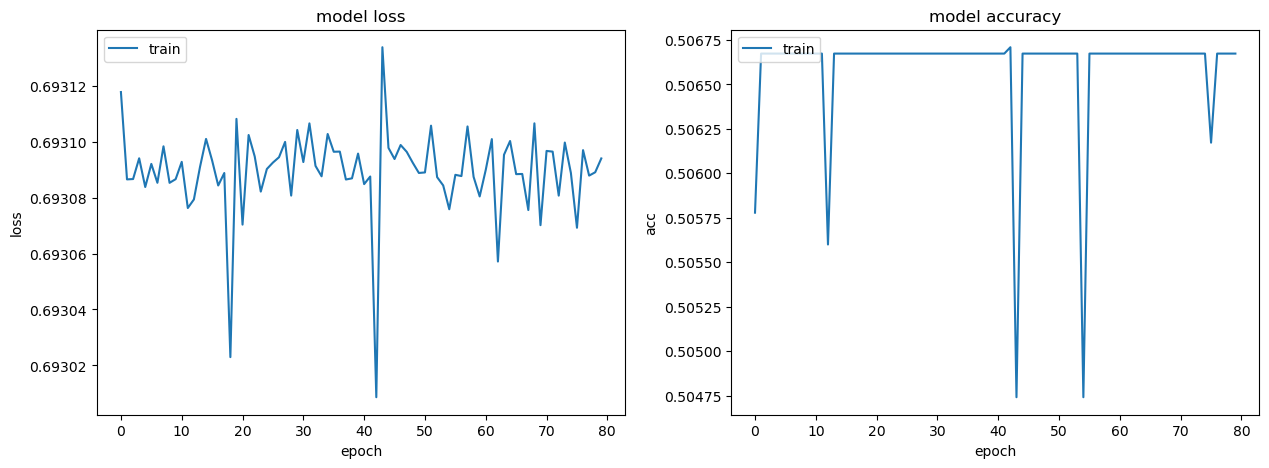

13765/13765 [==============================] - 3s 217us/sample - loss: 0.6931 - acc: 0.5067
Acuracy:  0.50671995
Predicted      1    All
Actual                 
0           6790   6790
1           6975   6975
All        13765  13765


In [15]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(1000, input_dim = 21, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative large - medium)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 6s 221us/sample - loss: 0.5621 - acc: 0.7079
Epoch 2/80
27947/27947 [==============================] - 4s 159us/sample - loss: 0.5391 - acc: 0.7283
Epoch 3/80
27947/27947 [==============================] - 6s 202us/sample - loss: 0.5356 - acc: 0.7315
Epoch 4/80
27947/27947 [==============================] - 6s 220us/sample - loss: 0.5341 - acc: 0.7325
Epoch 5/80
27947/27947 [==============================] - 6s 210us/sample - loss: 0.5315 - acc: 0.7358
Epoch 6/80
27947/27947 [==============================] - 6s 214us/sample - loss: 0.5310 - acc: 0.7356
Epoch 7/80
27947/27947 [==============================] - 6s 210us/sample - loss: 0.5303 - acc: 0.7356
Epoch 8/80
27947/27947 [==============================] - 6s 210us/sample - loss: 0.5292 - acc: 0.7354
Epoch 9/80
27947/27947 [==============================] - 6s 206us/sample - loss: 0.5292 - acc: 0.7344
Epoch 10/80
27947/27947 [=========================

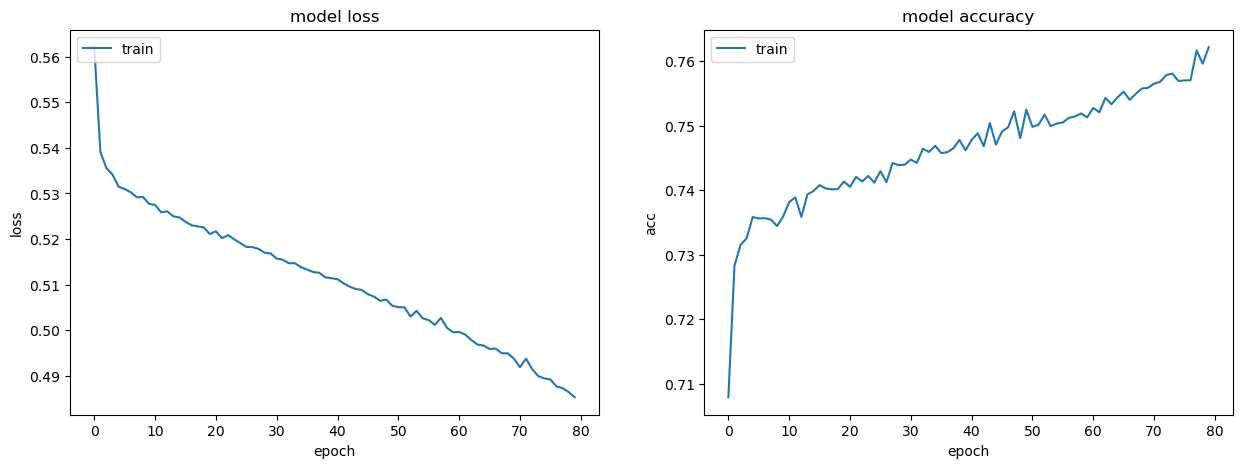

13765/13765 [==============================] - 1s 106us/sample - loss: 0.5426 - acc: 0.7337
Acuracy:  0.7336724
Predicted     0     1    All
Actual                      
0          4498  2292   6790
1          1374  5601   6975
All        5872  7893  13765


In [16]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(500, input_dim = 21, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative medium)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 5s 171us/sample - loss: 0.5778 - acc: 0.7024
Epoch 2/80
27947/27947 [==============================] - 5s 162us/sample - loss: 0.5406 - acc: 0.7295
Epoch 3/80
27947/27947 [==============================] - 4s 158us/sample - loss: 0.5359 - acc: 0.7309
Epoch 4/80
27947/27947 [==============================] - 4s 158us/sample - loss: 0.5344 - acc: 0.7316
Epoch 5/80
27947/27947 [==============================] - 4s 159us/sample - loss: 0.5319 - acc: 0.7352
Epoch 6/80
27947/27947 [==============================] - 4s 160us/sample - loss: 0.5313 - acc: 0.7349
Epoch 7/80
27947/27947 [==============================] - 6s 201us/sample - loss: 0.5307 - acc: 0.7352
Epoch 8/80
27947/27947 [==============================] - 6s 216us/sample - loss: 0.5294 - acc: 0.7360
Epoch 9/80
27947/27947 [==============================] - 6s 206us/sample - loss: 0.5291 - acc: 0.7352
Epoch 10/80
27947/27947 [=========================

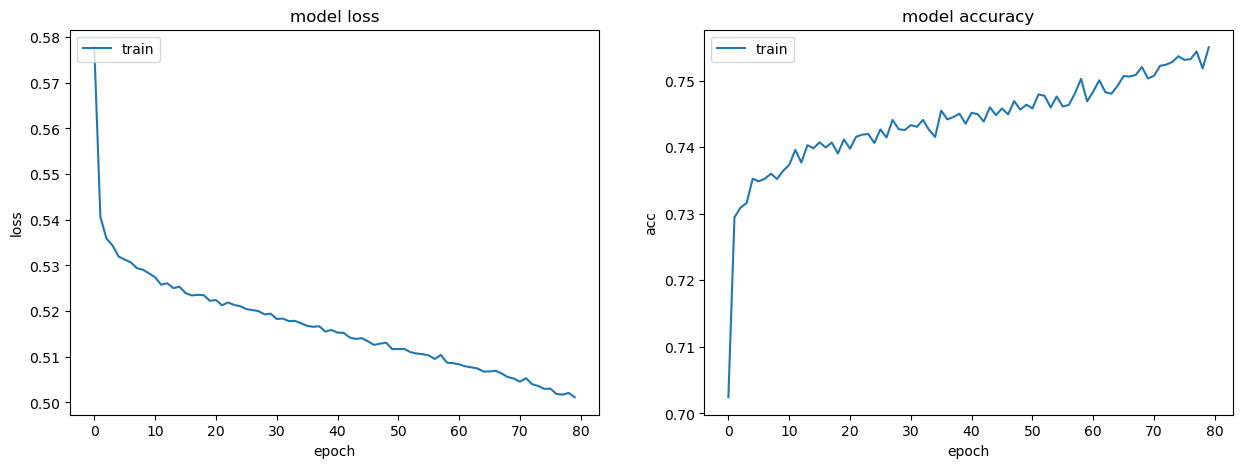

13765/13765 [==============================] - 2s 114us/sample - loss: 0.5275 - acc: 0.7377
Acuracy:  0.73774064
Predicted     0     1    All
Actual                      
0          4715  2075   6790
1          1535  5440   6975
All        6250  7515  13765


In [17]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(100, input_dim = 21, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative medium - small)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 5s 185us/sample - loss: 0.6094 - acc: 0.6795
Epoch 2/80
27947/27947 [==============================] - 4s 151us/sample - loss: 0.5483 - acc: 0.7253
Epoch 3/80
27947/27947 [==============================] - 5s 174us/sample - loss: 0.5407 - acc: 0.7291
Epoch 4/80
27947/27947 [==============================] - 5s 188us/sample - loss: 0.5379 - acc: 0.7303
Epoch 5/80
27947/27947 [==============================] - 5s 175us/sample - loss: 0.5347 - acc: 0.7343
Epoch 6/80
27947/27947 [==============================] - 5s 174us/sample - loss: 0.5341 - acc: 0.7330
Epoch 7/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.5331 - acc: 0.7324
Epoch 8/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.5327 - acc: 0.7342
Epoch 9/80
27947/27947 [==============================] - 5s 182us/sample - loss: 0.5324 - acc: 0.7354
Epoch 10/80
27947/27947 [=========================

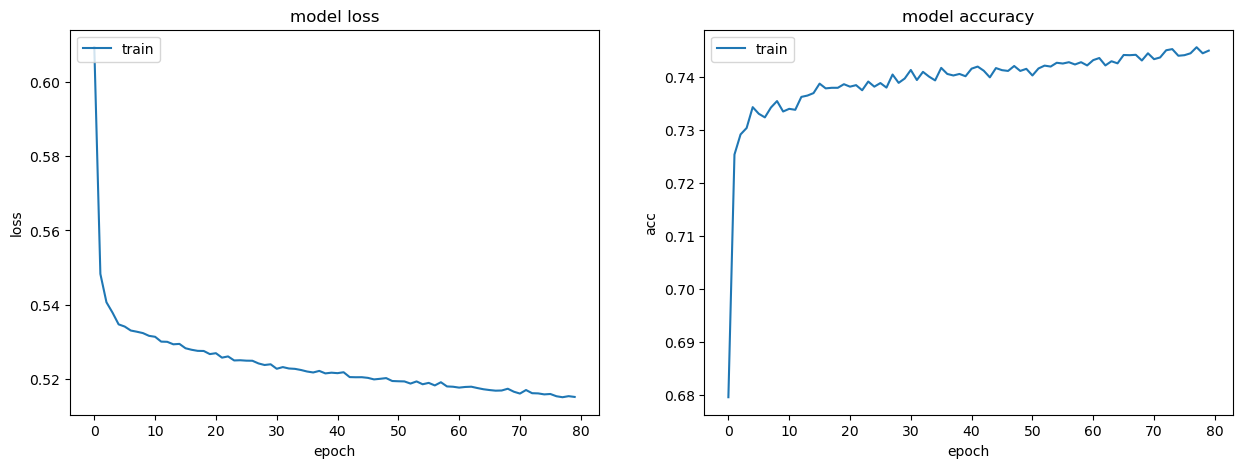

13765/13765 [==============================] - 1s 98us/sample - loss: 0.5243 - acc: 0.7367
Acuracy:  0.7367236
Predicted     0     1    All
Actual                      
0          4490  2300   6790
1          1324  5651   6975
All        5814  7951  13765


In [18]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(50, input_dim = 21, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()


# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Building the model (relative small)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 4s 154us/sample - loss: 0.6576 - acc: 0.6292
Epoch 2/80
27947/27947 [==============================] - 4s 132us/sample - loss: 0.5988 - acc: 0.6912
Epoch 3/80
27947/27947 [==============================] - 4s 131us/sample - loss: 0.5668 - acc: 0.7134
Epoch 4/80
27947/27947 [==============================] - 4s 132us/sample - loss: 0.5566 - acc: 0.7195
Epoch 5/80
27947/27947 [==============================] - 4s 133us/sample - loss: 0.5517 - acc: 0.7242
Epoch 6/80
27947/27947 [==============================] - 4s 133us/sample - loss: 0.5489 - acc: 0.7249
Epoch 7/80
27947/27947 [==============================] - 4s 134us/sample - loss: 0.5470 - acc: 0.7267
Epoch 8/80
27947/27947 [==============================] - 4s 136us/sample - loss: 0.5453 - acc: 0.7285
Epoch 9/80
27947/27947 [==============================] - 4s 135us/sample - loss: 0.5443 - acc: 0.7283
Epoch 10/80
27947/27947 [=========================

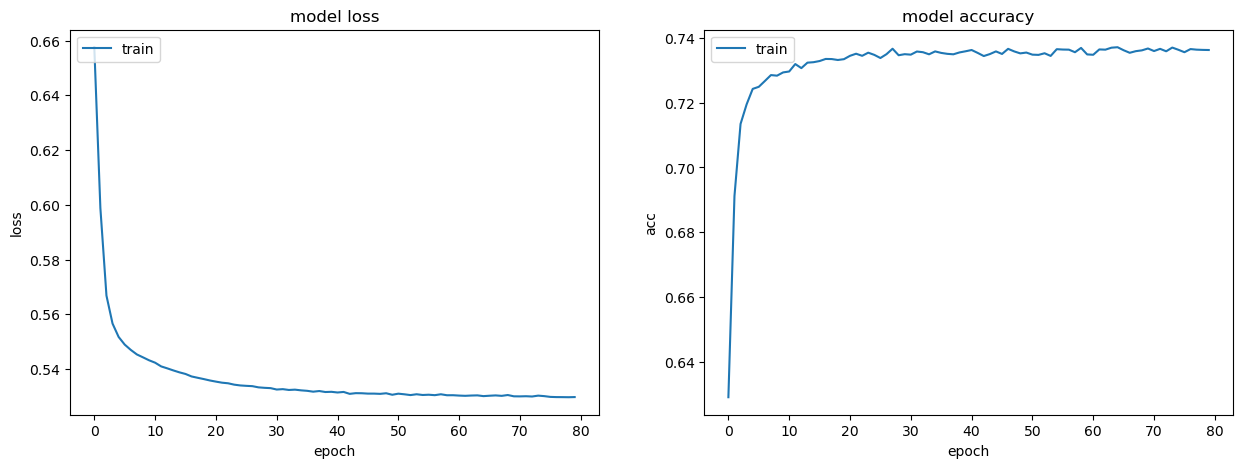

13765/13765 [==============================] - 1s 96us/sample - loss: 0.5359 - acc: 0.7300
Acuracy:  0.7299673
Predicted     0     1    All
Actual                      
0          4590  2200   6790
1          1517  5458   6975
All        6107  7658  13765


In [19]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(10, input_dim = 21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the test above from the models, we noticed that the small to medium model is perform way better than the large model. This might because of the correlation between attributes and the label class is not highly correlated, so the model will work better with small model. So for further testing, we will keep tuning in medium to small network.

#### Further testing - between small and small - medium

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 5s 162us/sample - loss: 0.6271 - acc: 0.6589
Epoch 2/80
27947/27947 [==============================] - 4s 142us/sample - loss: 0.5554 - acc: 0.7196
Epoch 3/80
27947/27947 [==============================] - 4s 141us/sample - loss: 0.5447 - acc: 0.7269
Epoch 4/80
27947/27947 [==============================] - 4s 145us/sample - loss: 0.5408 - acc: 0.7289
Epoch 5/80
27947/27947 [==============================] - 4s 144us/sample - loss: 0.5374 - acc: 0.7322
Epoch 6/80
27947/27947 [==============================] - 4s 147us/sample - loss: 0.5361 - acc: 0.7322
Epoch 7/80
27947/27947 [==============================] - 4s 143us/sample - loss: 0.5348 - acc: 0.7326
Epoch 8/80
27947/27947 [==============================] - 4s 145us/sample - loss: 0.5342 - acc: 0.7338
Epoch 9/80
27947/27947 [==============================] - 4s 145us/sample - loss: 0.5335 - acc: 0.7332
Epoch 10/80
27947/27947 [=========================

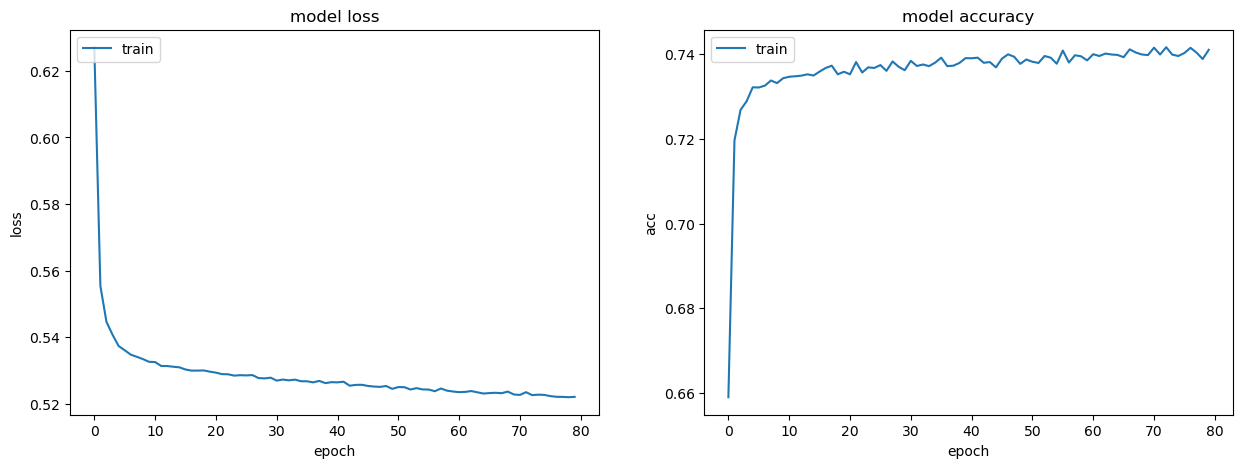

13765/13765 [==============================] - 2s 149us/sample - loss: 0.5287 - acc: 0.7376
Acuracy:  0.7375954
Predicted     0     1    All
Actual                      
0          4567  2223   6790
1          1389  5586   6975
All        5956  7809  13765


In [20]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, input_dim = 21, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Compare the result with small, the performance almost the same, maybe we can try with different number

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 4s 146us/sample - loss: 0.6692 - acc: 0.6074
Epoch 2/80
27947/27947 [==============================] - 4s 129us/sample - loss: 0.6093 - acc: 0.6886
Epoch 3/80
27947/27947 [==============================] - 4s 130us/sample - loss: 0.5792 - acc: 0.7047
Epoch 4/80
27947/27947 [==============================] - 3s 122us/sample - loss: 0.5656 - acc: 0.7152
Epoch 5/80
27947/27947 [==============================] - 4s 127us/sample - loss: 0.5588 - acc: 0.7201
Epoch 6/80
27947/27947 [==============================] - 4s 128us/sample - loss: 0.5549 - acc: 0.7210
Epoch 7/80
27947/27947 [==============================] - 4s 125us/sample - loss: 0.5524 - acc: 0.7235
Epoch 8/80
27947/27947 [==============================] - 4s 128us/sample - loss: 0.5504 - acc: 0.7254
Epoch 9/80
27947/27947 [==============================] - 4s 128us/sample - loss: 0.5492 - acc: 0.7243
Epoch 10/80
27947/27947 [=========================

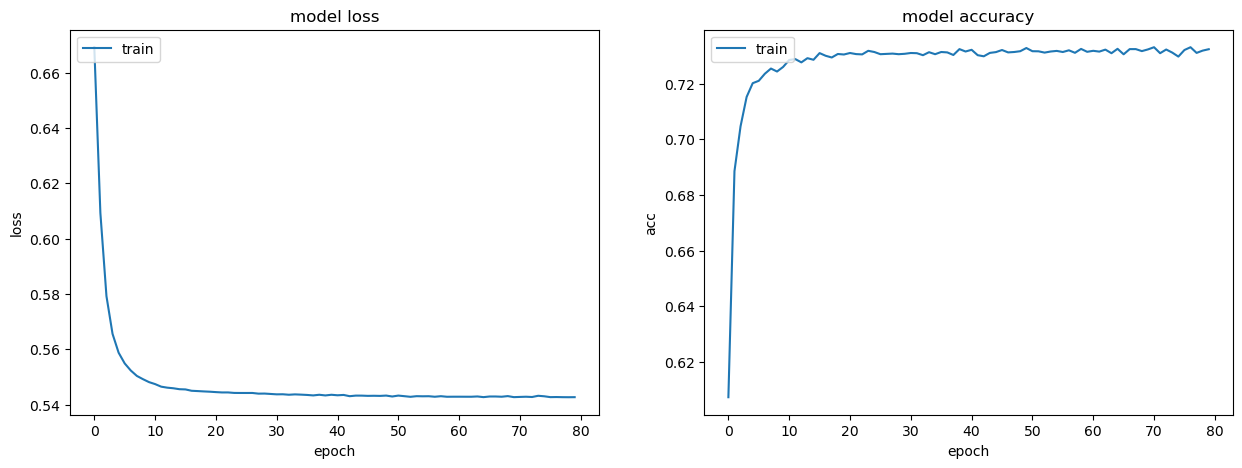

13765/13765 [==============================] - 1s 85us/sample - loss: 0.5469 - acc: 0.7244
Acuracy:  0.7243734
Predicted     0     1    All
Actual                      
0          4769  2021   6790
1          1773  5202   6975
All        6542  7223  13765


In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 5s 163us/sample - loss: 0.6741 - acc: 0.5998
Epoch 2/80
27947/27947 [==============================] - 4s 146us/sample - loss: 0.6187 - acc: 0.6988
Epoch 3/80
27947/27947 [==============================] - 4s 141us/sample - loss: 0.5857 - acc: 0.7149
Epoch 4/80
27947/27947 [==============================] - 4s 139us/sample - loss: 0.5682 - acc: 0.7211
Epoch 5/80
27947/27947 [==============================] - 4s 141us/sample - loss: 0.5583 - acc: 0.7261
Epoch 6/80
27947/27947 [==============================] - 4s 141us/sample - loss: 0.5526 - acc: 0.7256
Epoch 7/80
27947/27947 [==============================] - 4s 144us/sample - loss: 0.5486 - acc: 0.7292
Epoch 8/80
27947/27947 [==============================] - 4s 142us/sample - loss: 0.5459 - acc: 0.7301
Epoch 9/80
27947/27947 [==============================] - 4s 139us/sample - loss: 0.5439 - acc: 0.7293
Epoch 10/80
27947/27947 [=========================

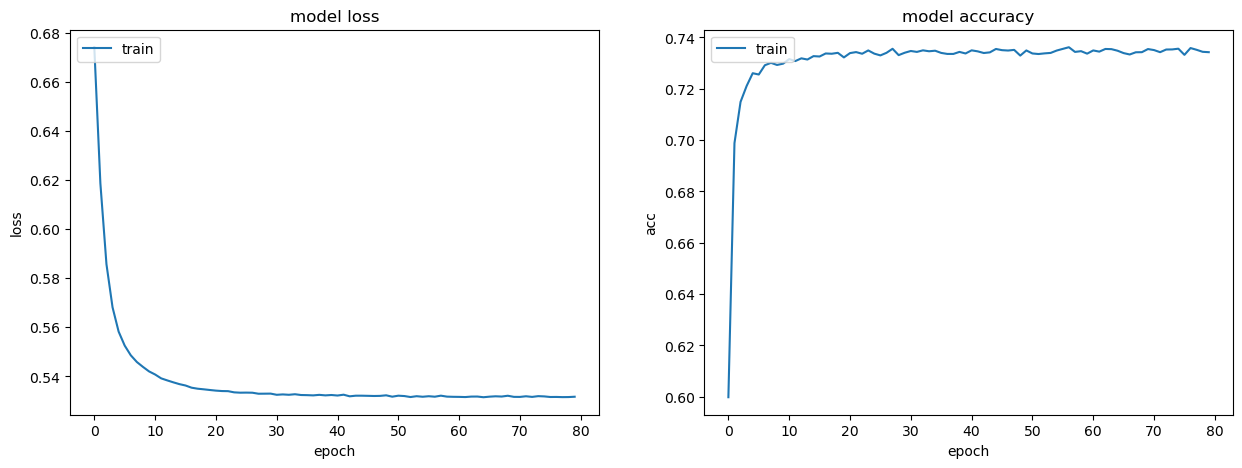

13765/13765 [==============================] - 1s 88us/sample - loss: 0.5377 - acc: 0.7295
Acuracy:  0.7295314
Predicted     0     1    All
Actual                      
0          4577  2213   6790
1          1510  5465   6975
All        6087  7678  13765


In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

After some tweaking on the layers, the results showed that the accuracy is around 74.6%. So i'll use the last neural network as it got the highest accuracy on no diabetes which is 4750 / 6790.

### Hyperparameter investigation
- 8 batch sizes [suitable epochs]
- 3 optimizers
- 2 or more regularization techniques

In [23]:
# Funtion to provide plot for loss and accuracy
def plot_acc_loss2(results):
  plt.subplot(1,2,1)
  # summarize history for loss
  plt.plot(results.history['loss'])
  plt.plot(results.history['val_loss'])
  plt.title('Model Loss ')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(results.history['acc'])
  plt.plot(results.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#### Trying with different batch sizes and epochs.
- During the model was testing with different capacity and depth, the model were trained with batch sizes = 32. So we will tried other here.

In [24]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

batchesToTest = [1, 8, 32, 64, 128, 256, 512, 1000]
epochToTest = [5, 30, 50, 80, 100, 100, 120, 120]

for index, batchesTest in enumerate(batchesToTest):
    print(" ************************ Testing ************************ ")

    model = Sequential()
    model.add(Dense(5, input_dim = 21, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    results = model.fit(X_train, Y_train, epochs=epochToTest[index], batch_size=batchesToTest[index], verbose=1, validation_data = (X_test, Y_test))

    print("Batch Size : ", batchesToTest[index], "\nEpoch: ", epochToTest[index])
    plot_acc_loss2(results)
    dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
    dl_y_pred = dl_y_pred.flatten()
    print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
    print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/5
17283/27947 [=================>............] - ETA: 53s - loss: 0.6230 - acc: 0.6666

KeyboardInterrupt: 

From the graphs above, I have tried with 8 different batch sizes and epochs as following:
- Batch Sizes: [1, 8, 32, 64, 128, 256, 512, 1000]
- Epochs: [10, 30, 80, 80, 100, 100, 150, 150]

All the testing on every batch sizes has almost the same results which is around 74%, but the 32 batch sizes with 80 epochs has the best accuracy on 74.6%. 

#### Trying with different Optimizers
- sgd
- rmspropm
- adagrad
- adam

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing SGD ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])
results_sgd = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)


print(" ************************ Testing RMSPROP ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])
results_rmspropm = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)


print(" ************************ Testing ADAGRAD ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['acc'])
results_adagrad = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)


print(" ************************ Testing ADAM ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

results_adam = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# Plotting Loss graph
plt.subplot(1,2,1)
plt.plot(results_sgd.history['loss'])
plt.plot(results_rmspropm.history['loss'])
plt.plot(results_adagrad.history['loss'])
plt.plot(results_adam.history['loss'])
plt.title('Model loss per learning rate function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGD', 'RmsProp', 'Adagrad', 'Adam'], loc='upper right')

plt.subplot(1,2,2)
plt.plot(results_sgd.history['acc'])
plt.plot(results_rmspropm.history['acc'])
plt.plot(results_adagrad.history['acc'])
plt.plot(results_adam.history['acc'])
plt.title('Model Accuracy per learning rate function')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['SGD', 'RmsProp', 'Adagrad', 'Adam'], loc='upper left')
plt.show()

From the graph above, we can noticed that the "Adagrad" optimizer is not working good as the accuracy is the lowest and the loss is the highest. The "SGD", "Rmsprop" and "Adam" optimizers ahs similar accuracy and loss but I would say that the "Rmsprop" and "Adam" is still sligthly better than the "SGD" optimizer. 

Hence, I will use the "Rmsprop" and "Adam" for the Grid Search.

#### Regularization Techniques
- Drop out
- Bias / No bias
- Glorot Uniform / Glorot Normal
- Checkpoint + Early Stopping

##### Dropout

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing With Dropout ************************ ")
model = Sequential()
model.add(Dropout(0.2 , input_shape = (21,)))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

plot_acc_loss2(results)
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

he first regularization techniques I used is the dropout function. This is to prevent the model overfitting to the dataset, as we can see from the graph that the accuracy for test dataset is perform better than the training dataset. This is due to the dropout function which randomly dropping around 20% data on every layer.

##### Bias / No Bias

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing Bias ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', use_bias = True))
model.add(Dense(3, activation='relu', use_bias = True))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_bias = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


print(" ************************ Testing No Bias ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', use_bias = False))
model.add(Dense(3, activation='relu', use_bias = False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_no_bias = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


plot_acc_loss2(results_bias)
print('Graph for Bias')
plot_acc_loss2(results_no_bias)
print('Graph for No Bias')

##### Glorot Uniform / Glorot Normal

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing Glorot Uniform ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(3, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_uni = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


print(" ************************ Testing Glorot Normal ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(3, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_nor = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

print('Graph for Uniform')
plot_acc_loss2(results_uni)

print('Graph for Normal')
plot_acc_loss2(results_nor)

From the graph above, we can see that the Glorot Uniform and Glorot Normal have similr accuracy but the Glorot Normal has less loss comapare to the Glorot Uniform. So we will use Glorot Normal for the Grid Search technique.

##### Checkpoint + Early Stopping

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing  Checkpoint + Early Stopping ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

checkpoint = ModelCheckpoint("myBest.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
earlystopping = EarlyStopping(monitor="val_loss",patience= 5)
callbacks_list = [checkpoint, earlystopping]

results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, callbacks=callbacks_list, validation_data=(X_test, Y_test))
plot_acc_loss2(results)

From the verbose above, we know that the early stopping is working as the epoch stop at around 70 even we set it at 80 epcohs.

### Grid search
- best 4 batch sizes
- best 2 optimizers
- 1 weight initializer
- 3 epochs
- early stopping allowed

In [ ]:
# Function (Step) of model for training
def gs_model(optimizerIn='adam', initIn='GlorotNormal'):
    model = Sequential()
    model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer=initIn))
    model.add(Dense(3, activation='relu', kernel_initializer=initIn))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizerIn, metrics=['acc'])
    return model

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = KerasClassifier(build_fn=gs_model)

# grid search epochs, batch size and optimizer
batches = [32, 64, 128, 256]
optimizers = ['rmsprop', 'adam']
epochs = [30, 80, 120]

# Checkpointing + Early Stopping
checkpoint = ModelCheckpoint("myBest.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
earlystopping = EarlyStopping(monitor="loss",patience= 3)
callbacks_list = [checkpoint, earlystopping]

param_grid = dict(optimizerIn=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train, callbacks=callbacks_list)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-18-063522788937>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=gs_model)


Streaming output truncated to the last 5000 lines.
Epoch 30: acc did not improve from 0.75056
88/88 [==============================] - 0s 3ms/step - loss: 0.5291 - acc: 0.7375
Epoch 31/80
88/88 [==============================] - ETA: 0s - loss: 0.5285 - acc: 0.7372
Epoch 31: acc did not improve from 0.75056
88/88 [==============================] - 0s 3ms/step - loss: 0.5285 - acc: 0.7372
Epoch 32/80
78/88 [=========================>....] - ETA: 0s - loss: 0.5309 - acc: 0.7362
Epoch 32: acc did not improve from 0.75056
88/88 [==============================] - 0s 4ms/step - loss: 0.5283 - acc: 0.7376
Epoch 33/80
85/88 [===========================>..] - ETA: 0s - loss: 0.5291 - acc: 0.7369
Epoch 33: acc did not improve from 0.75056
88/88 [==============================] - 0s 5ms/step - loss: 0.5280 - acc: 0.7374
Epoch 34/80
73/88 [=======================>......] - ETA: 0s - loss: 0.5285 - acc: 0.7380
Epoch 34: acc did not improve from 0.75056
88/88 [==============================] - 0s 4m

From the Grid Search results above, we able to know that the best model will be using batch_size: 32, epochs: 80, optimizer: RMSPROP, with intializer: Glorot Normal. The accuracy for the overall grid search remian from 68.7% - 74.5%, with 0.02 - 0.09 loss.

### Final Model presentation and performance evaluation


In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Final Model Testing ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])

results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, shuffle = True, validation_data=(X_test, Y_test))
plot_acc_loss2(results)
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


### Analysis of performance per class

### Analysis of performance for target group
- 2 group required

In [ ]:
# definition to provide the metrics
def subMetrics(targetGroup, act, pred):
  print("Metrics for: ", targetGroup)
  correct = 0
  # parse both lists to numpy arrays
  act = np.array(act)
  pred = np.array(pred)
  # There may be an easier way to do this, however, I believe it is a manual process!
  for index, item in enumerate(act):
    if item == pred[index]:
      correct += 1
  # print accuracy, and the confusion matrix
  accuracy = round((correct / len(act)) * 100,2)
  print("Accuracy:", accuracy, "%")
  print(pd.crosstab( np.array(act),  np.array(pred), rownames=['Actual'], colnames=['Predicted'], margins=True))

In [ ]:
# Example for smoker target groups
smoker_pred = []      # Smoker was label encoded as 1
smoker_actual_class = []

smokerN_pred = []        # Non-smoker was label encoded as 0
smokerN_actual_class = []

for index,row in enumerate(X_test):
    if row[4] == 1:
        smoker_pred.append(dl_y_pred[index])
        smoker_actual_class.append(Y_test[index])
    elif row[4] == 0:
        smokerN_pred.append(dl_y_pred[index])
        smokerN_actual_class.append(Y_test[index])

# Print the representation of each target group
print("Smoker instances in the test set:", len(smoker_pred))
print("Non-smoker instances in the test set:  ", len(smokerN_pred))


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("Smoker", smoker_actual_class, smoker_pred)
print("\n")
subMetrics("Non-smoker", smokerN_actual_class, smokerN_pred)

I have tried to look at whether smoker will effect people to get diabetes. From the confusion matrics show that non-smoker and smoker have almost the same amount of people had diabetes.

This mean that whether the people were smoking do not really effect the chances of getting diabetes. Besides that, the results from above also shows that the dataset actually quite fair from collecting smoker and non-smoker people to investigate the condition of diabetes.

In [ ]:
# Example for smoker target groups
bp_pred = []      # High Blood Pressure was label encoded as 1
bp_actual_class = []

bpN_pred = []        # Non-high Blood Pressure was label encoded as 0
bpN_actual_class = []

for index,row in enumerate(X_test):
    if row[0] == 1:
        bp_pred.append(dl_y_pred[index])
        bp_actual_class.append(Y_test[index])
    elif row[0] == 0:
        bpN_pred.append(dl_y_pred[index])
        bpN_actual_class.append(Y_test[index])

# Print the representation of each target group
print("High Blood Pressure instances in the test set:", len(bp_pred))
print("Non-high Blood Pressure instances in the test set:  ", len(bpN_pred))


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("High Blood Pressure", bp_actual_class, bp_pred)
print("\n")
subMetrics("Non-high Blood Pressure", bpN_actual_class, bpN_pred)

The above target group is about whether the people have high blood pressure or not. The differences instances for non-high and high blood pressure people have almost 2000 different, and mostly high blood pressure has more people suffering diabetes. As we can see from the matrics, more than 50% of high blood pressure people are actually having diabetes as well and only 10% of people having diabetes with non-high blood pressure.

This means that people who suffering diabetes actually will high chances suffering with high blood pressure as well.

### Summary and Conclusion

In a conclusion, this deep learning CA aimed to develop a model for predicting diabetes based on the provided dataset. Several experiments were conducted, exploring different network topologies, hyperparameter tuning, and regularization techniques. We also used the GridSearch CV to get the best model after trying with different combination of hyperparameter and techniques. The performance of the models was evaluated by plotting loss and accuracy graph and using confusion metrics which included accuracy, precision, recall, and F1-score.


The analysis shows that the best-performing model achieved an accuracy of 74% with the following prarameter:
- batch size: 32
- epoch: 80
- optimizer: RMSPROP
- initializer: Glorot Normal.


From the different testing during the regularization techniques, the dropout function shows that it is helpful to prevent overfitting model. However, it still need to be watch out for underfitting problem might occer. Besides that, the bias / no-bias function had shown that the no-bias function actually work better thatn bias function, but it might highly cause the model over-fitting to the dataset and not able to use the model in real world. The early stopping helps to prevent wasting memory and times of computer power which is very effective when doing the Grid Search CV function.